In [1]:
# import important packages
# load dataset
# add error handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Load dataset from a CSV file.
    
    Parameters:
    file_path (str): Path to the CSV file.
    
    Returns:
    pd.DataFrame: Loaded dataset.
    """
    try:
        data = pd.read_csv(file_path)
        data.drop(columns="Unnamed: 0", inplace=True)
        print(f"Data loaded successfully from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return None
    except pd.errors.ParserError:
        print("Error: There was a parsing error while reading the file.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

df = load_data('../data/raw_analyst_ratings.csv')
print(df.head())

Data loaded successfully from ../data/raw_analyst_ratings.csv
                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00     A  
3 

In [2]:
print("columns:", df.columns)

columns: Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [3]:
print("Data types:")
print(df.dtypes)

Data types:
headline     object
url          object
publisher    object
date         object
stock        object
dtype: object


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB
None


In [6]:
print(df.isna().sum())

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64


Discriptive Analysis

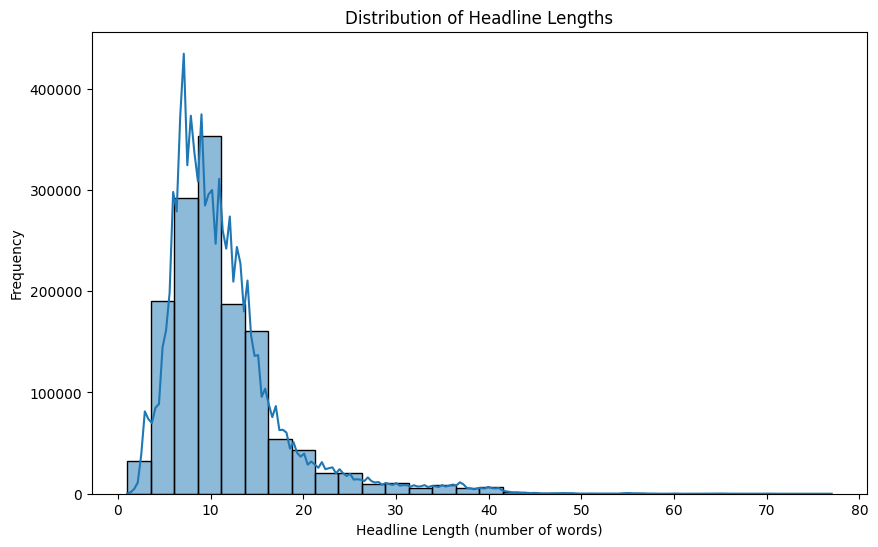

In [10]:
# headline length
def plot_headline_length_distribution(df):
    """
    Plot the distribution of headline lengths.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the dataset.
    """
    if 'headline' in df.columns:
        df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))
        plt.figure(figsize=(10, 6))
        sns.histplot(df['headline_length'], bins=30, kde=True)
        plt.title('Distribution of Headline Lengths')
        plt.xlabel('Headline Length (number of words)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("Error: 'headline' column not found in the DataFrame.")
plot_headline_length_distribution(df)

In [2]:
# check for duplicated rows
print(df.duplicated().sum())


1


In [3]:
print(df[df.duplicated(keep=False)])

                                          headline  \
559383  Top Performing Industries For July 1, 2015   
559384  Top Performing Industries For July 1, 2015   

                                                      url   publisher  \
559383  https://www.benzinga.com/news/15/07/5642290/to...  Lisa Levin   
559384  https://www.benzinga.com/news/15/07/5642290/to...  Lisa Levin   

                       date stock  
559383  2015-07-01 00:00:00   GME  
559384  2015-07-01 00:00:00   GME  


In [4]:
df = df.drop_duplicates() 
print(df.duplicated().sum())


0


In [20]:
from datetime import datetime

def parse_mixed_date(date_str):
    try:
        # Try parsing with timezone first
        return pd.to_datetime(date_str, utc=True)
    except ValueError:
        # Fallback to naive parsing + UTC localization
        return pd.to_datetime(date_str).tz_localize('UTC')

df['date'] = df['date'].apply(parse_mixed_date)

KeyboardInterrupt: 

In [6]:
# Parse dates, handling both timezone-aware and naive timestamps
df['date'] = pd.to_datetime(df['date'], utc=True, format='mixed')

# Convert all to UTC (naive ones will be treated as UTC)
df['date'] = df['date'].dt.tz_convert('UTC')  # For timezone-aware
df['date'] = df['date'].dt.tz_localize('UTC')  # For naive timestamps

TypeError: Already tz-aware, use tz_convert to convert.

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour


In [19]:
print(df['date'].head(n=50))

0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
5     2020-05-22 11:23:25-04:00
6     2020-05-22 09:36:20-04:00
7     2020-05-22 09:07:04-04:00
8     2020-05-22 08:37:59-04:00
9     2020-05-22 08:06:17-04:00
10          2020-05-22 00:00:00
11          2020-05-22 00:00:00
12          2020-05-21 00:00:00
13          2020-05-21 00:00:00
14          2020-05-21 00:00:00
15          2020-05-21 00:00:00
16          2020-05-18 00:00:00
17          2020-05-16 00:00:00
18          2020-05-15 00:00:00
19          2020-05-08 00:00:00
20          2020-05-05 00:00:00
21          2020-05-01 00:00:00
22          2020-04-28 00:00:00
23          2020-04-23 00:00:00
24          2020-04-22 00:00:00
25          2020-04-14 00:00:00
26          2020-04-08 00:00:00
27          2020-04-06 00:00:00
28          2020-04-02 00:00:00
29          2020-04-01 00:00:00
30          2020-03-31 00:00:00
31      

In [8]:
print(df['publisher'].unique())
# df['stock'].unique()[:10]
print(df['stock'].unique())

['Benzinga Insights' 'Lisa Levin' 'Vick Meyer' ... 'Robert Morris'
 'LeftCoastHedgie' 'Jeremie Capron']
['A' 'AA' 'AAC' ... 'ZU' 'ZUMZ' 'ZX']


In [11]:
df['headline_length'].describe()


count    1.407327e+06
mean     1.141671e+01
std      6.352998e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

In [29]:
df['url'].head()


0    https://www.benzinga.com/news/20/06/16190091/s...
1    https://www.benzinga.com/news/20/06/16170189/s...
2    https://www.benzinga.com/news/20/05/16103463/7...
3    https://www.benzinga.com/news/20/05/16095921/4...
4    https://www.benzinga.com/news/20/05/16095304/b...
Name: url, dtype: object

In [12]:
print(f"Total rows: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
df['publisher'].value_counts().head(10)
df['stock'].value_counts().head(10)


Total rows: 1407327
Date range: 2009-02-14 00:00:00+00:00 to 2020-06-11 21:12:35+00:00


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64

Headline Length

In [13]:
# Ensure headline is string
df['headline'] = df['headline'].astype(str)

# Length of headline in characters and words
df['headline_char_len'] = df['headline'].apply(len)

# Basic statistics
df[['headline_char_len', 'headline_length']].describe()


,headline_char_len,headline_length
count,1.407327e+06,1.407327e+06
mean,7.312054e+01,1.141671e+01
std,4.073532e+01,6.352998e+00
min,3.000000e+00,1.000000e+00
25%,4.700000e+01,7.000000e+00
50%,6.400000e+01,1.000000e+01
75%,8.700000e+01,1.300000e+01
max,5.120000e+02,7.700000e+01


Most active publishers

In [14]:
publisher_counts = df['publisher'].value_counts()

# Top 10 publishers
top_publishers = publisher_counts.head(10)
top_publishers


publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [33]:
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

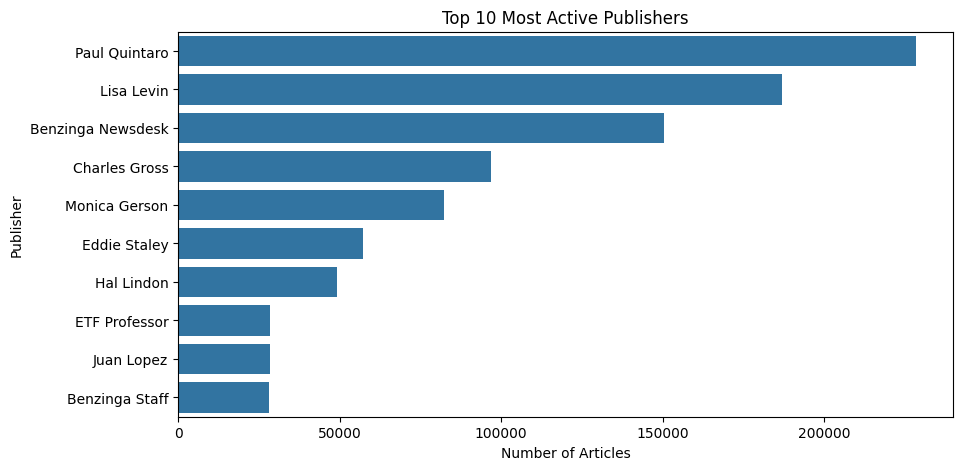

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Publication Trends Over Time

In [16]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df['publish_date'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year


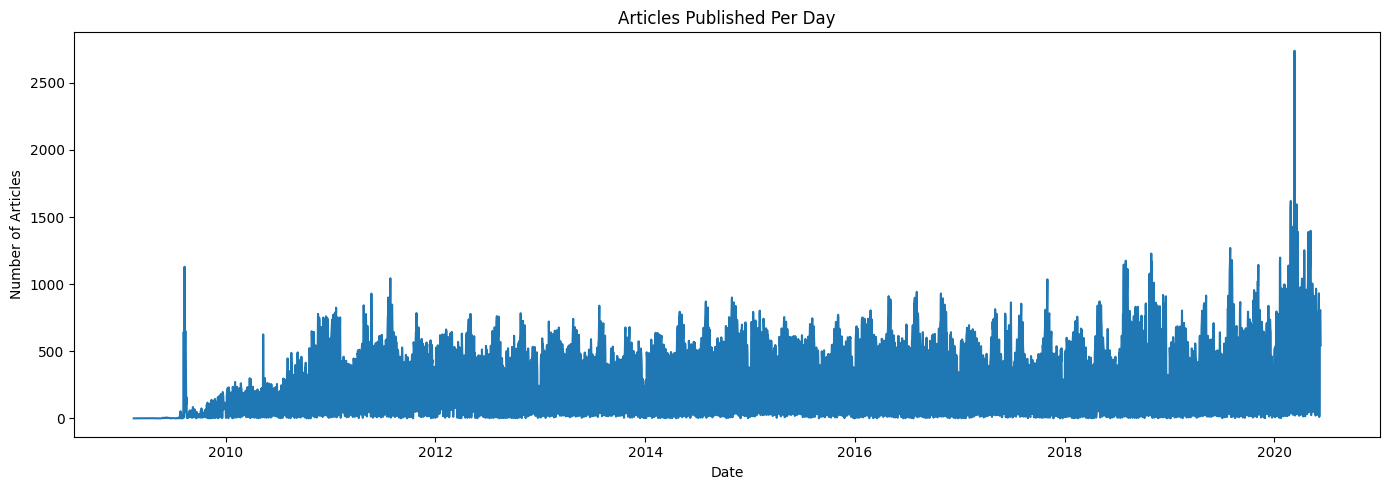

In [17]:
daily_counts = df.groupby('publish_date').size()

# Plot daily trend
plt.figure(figsize=(14, 5))
daily_counts.plot()
plt.title('Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


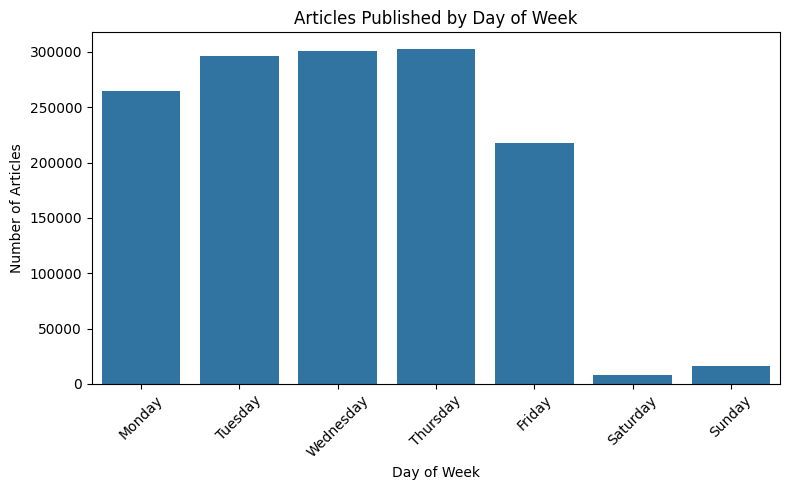

In [38]:
dow_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8, 5))
sns.barplot(x=dow_counts.index, y=dow_counts.values)
plt.title('Articles Published by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


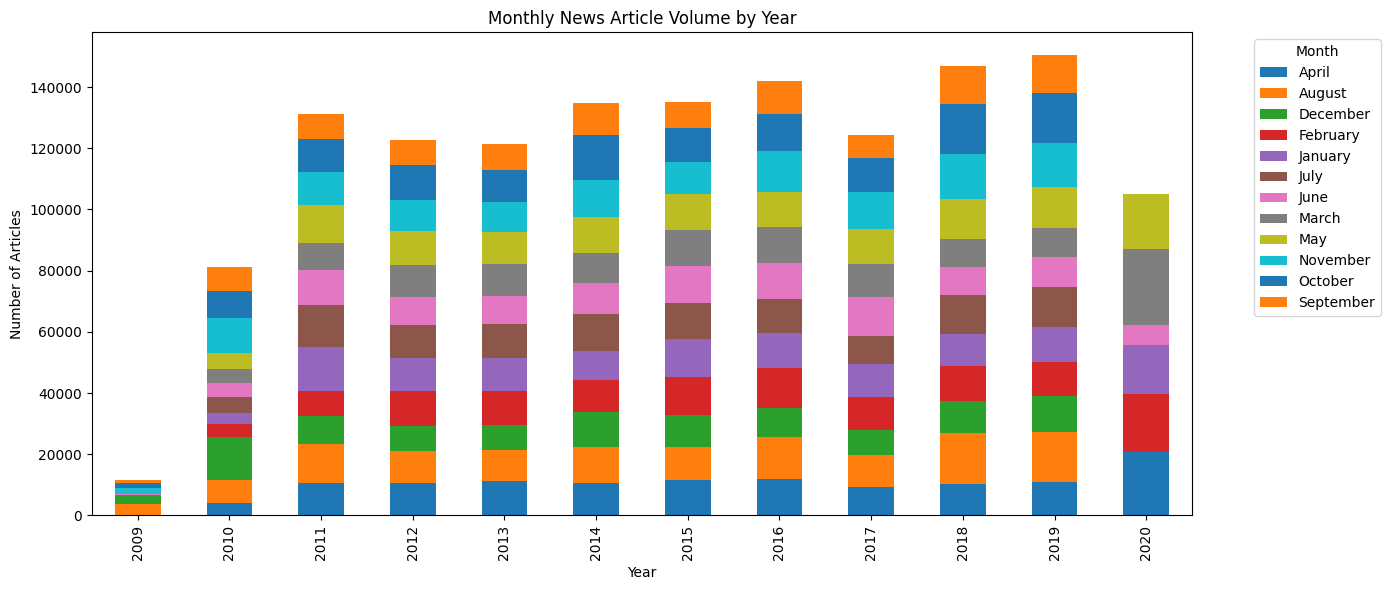

In [39]:
# Articles per month across all years
monthly_counts = df.groupby(['year', 'month']).size().unstack(fill_value=0)

monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Monthly News Article Volume by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_headline'] = df['headline'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
df['clean_headline']

0                               stocks hit week highs friday
1                            stocks hit week highs wednesday
2                                      biggest movers friday
3                       stocks moving fridays midday session
4          b securities maintains neutral agilent technol...
                                 ...                        
1407323                      top narrow based indexes august
1407324       recap wednesdays top percentage gainers losers
1407325    update oppenheimer color china zenix auto init...
1407326      oppenheimer initiates china zenix outperform pt
1407327    china zenix auto international opens trading i...
Name: clean_headline, Length: 1407327, dtype: object

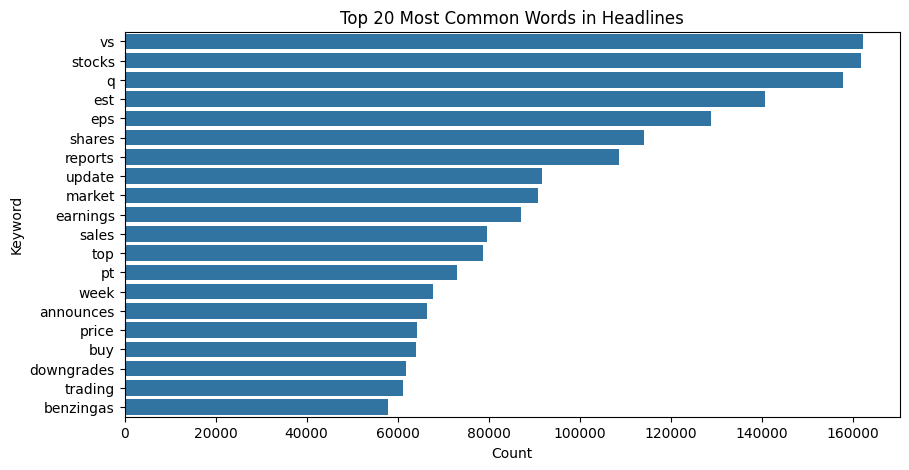

In [22]:
from collections import Counter

all_words = ' '.join(df['clean_headline']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Common Words in Headlines")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()


In [ ]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize
df['tokens'] = df['clean_headline'].apply(word_tokenize)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]


In [ ]:
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display topics
for i, topic in lda_model.print_topics():
    print(f"Topic {i+1}: {topic}")


In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['clean_headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Financial Headlines")
plt.show()


Time Series Analysis 

In [23]:
df['publish_date'] = df['date'].dt.date
df['publish_hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()


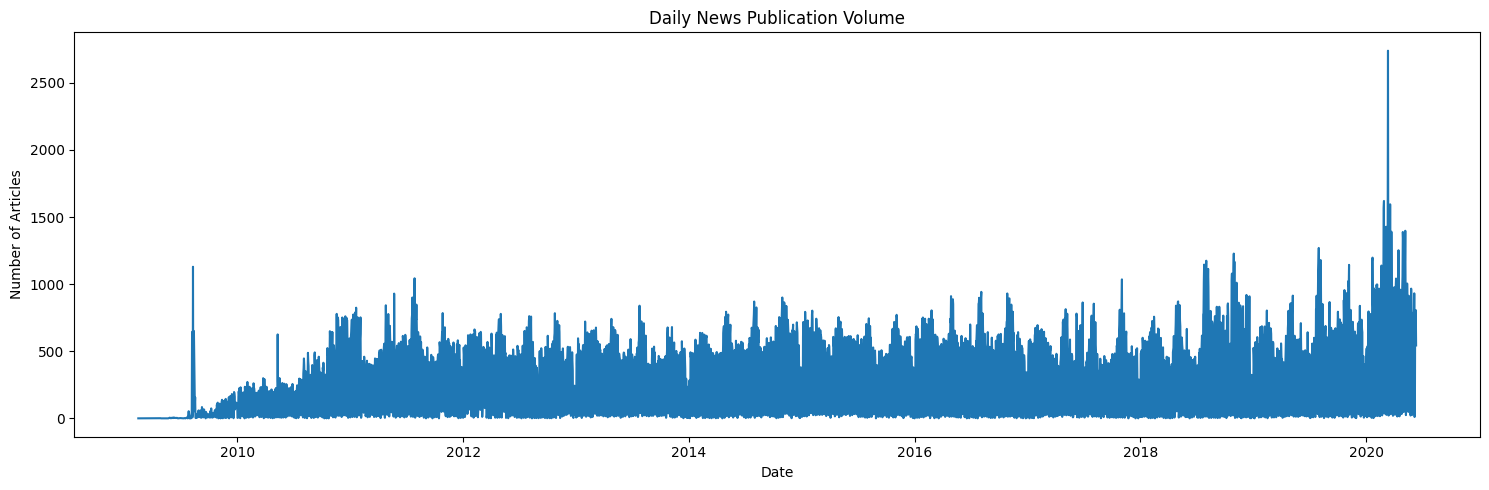

In [24]:
daily_counts = df.groupby('publish_date').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Daily News Publication Volume')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


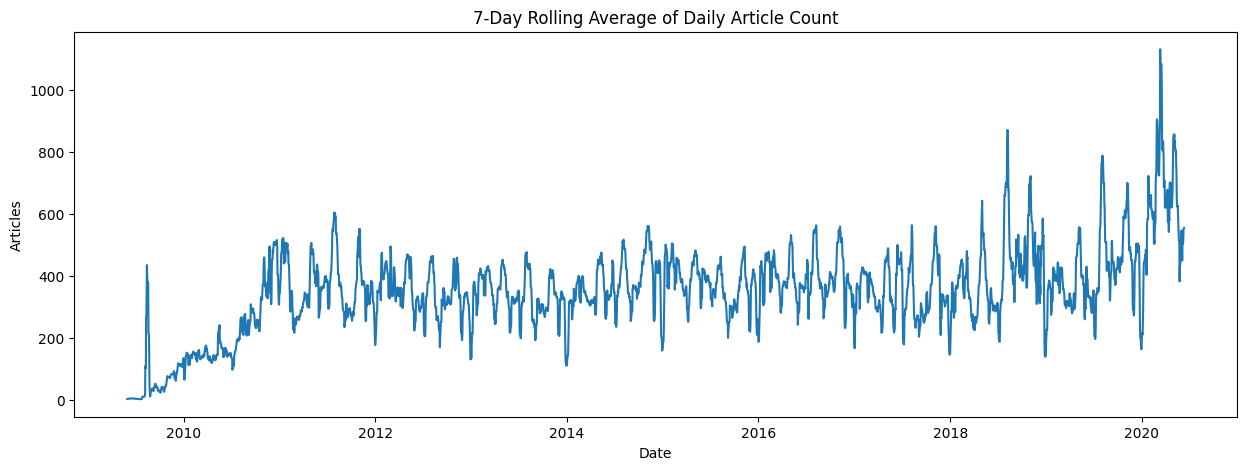

In [25]:
daily_counts.rolling(window=7).mean().plot(figsize=(15, 5))
plt.title('7-Day Rolling Average of Daily Article Count')
plt.xlabel('Date')
plt.ylabel('Articles')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19460\640507737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=df, palette='coolwarm')


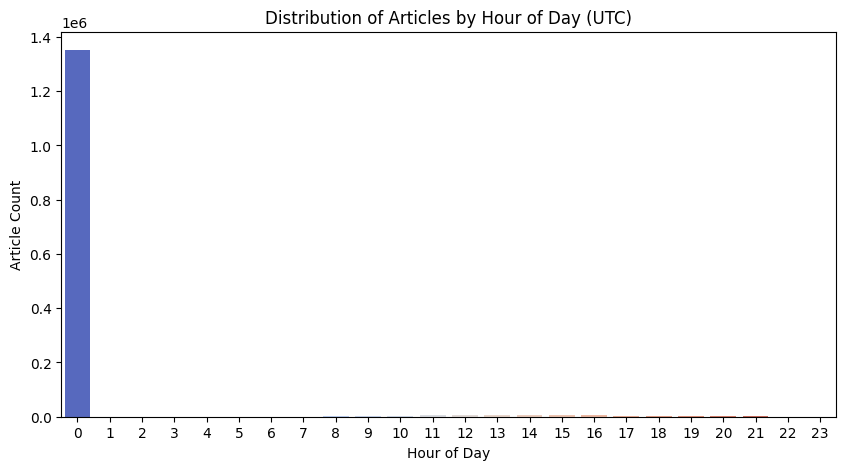

In [26]:

plt.figure(figsize=(10, 5))
sns.countplot(x='publish_hour', data=df, palette='coolwarm')
plt.title('Distribution of Articles by Hour of Day (UTC)')
plt.xlabel('Hour of Day')
plt.ylabel('Article Count')
plt.show()


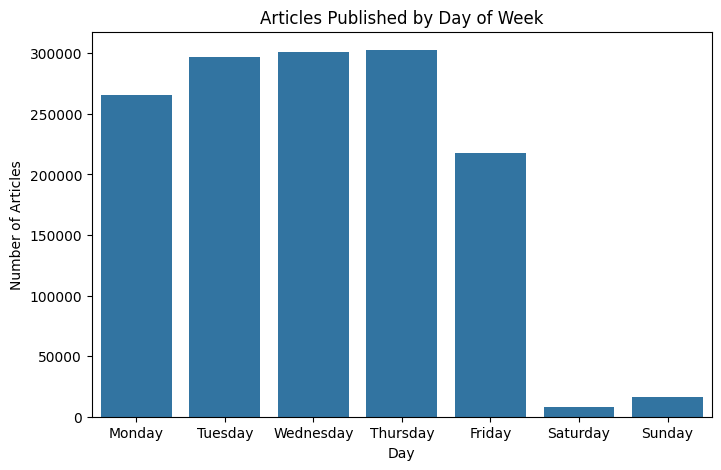

In [27]:
day_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Articles Published by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.show()


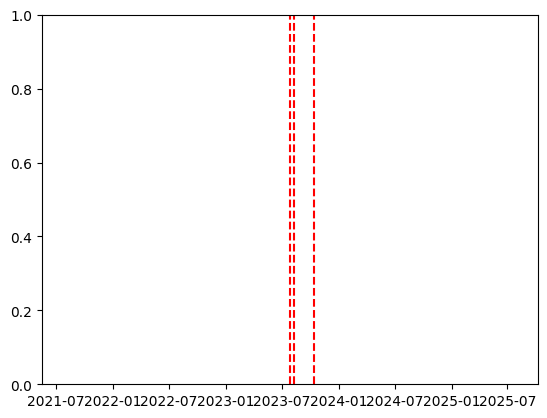

In [28]:
important_dates = ['2023-07-27', '2023-08-10', '2023-10-13']  # example dates
for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')


Publisher Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_19460\2052012936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="viridis")


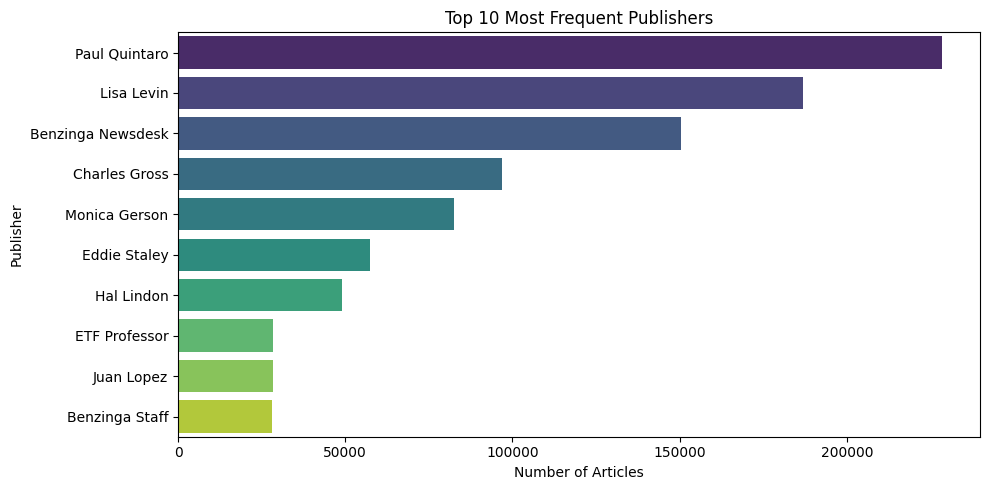

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="viridis")
plt.title("Top 10 Most Frequent Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()


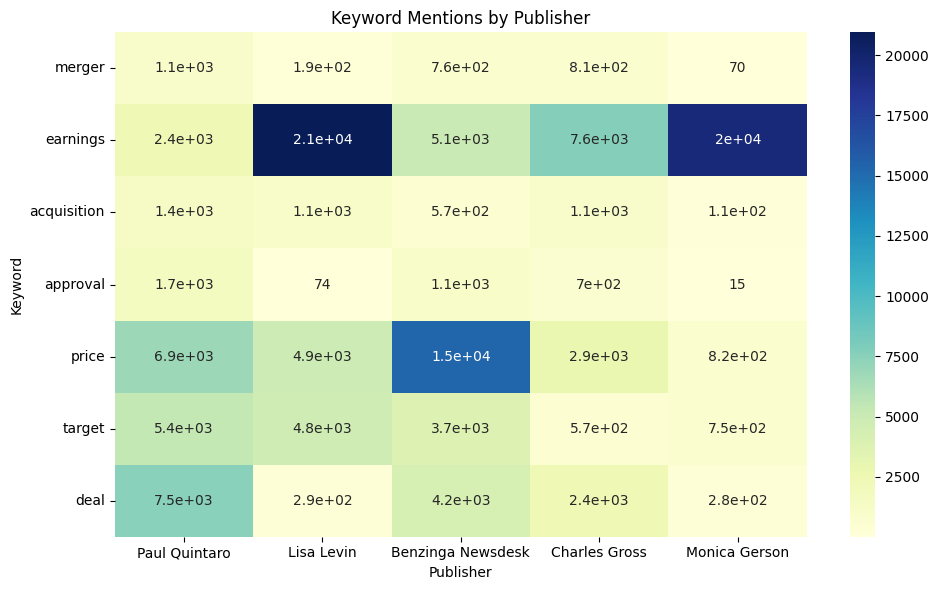

In [30]:
# Focus only on top N publishers
N = 5
top_pub_list = df['publisher'].value_counts().head(N).index
top_df = df[df['publisher'].isin(top_pub_list)]

# Optional: basic keyword heatmap per publisher
from collections import Counter

# Choose a list of financial keywords of interest
keywords = ['merger', 'earnings', 'acquisition', 'approval', 'price', 'target', 'deal']

keyword_counts = {pub: [] for pub in top_pub_list}
for pub in top_pub_list:
    subset = top_df[top_df['publisher'] == pub]['clean_headline'].str.cat(sep=' ')
    for word in keywords:
        keyword_counts[pub].append(subset.count(word))

# Convert to DataFrame
import pandas as pd

keyword_df = pd.DataFrame(keyword_counts, index=keywords)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(keyword_df, annot=True, cmap='YlGnBu')
plt.title('Keyword Mentions by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


In [31]:
import re

# Check for presence of '@' in publisher names
df['is_email'] = df['publisher'].str.contains('@')

# Extract domain from email publishers
df['email_domain'] = df['publisher'].apply(
    lambda x: x.split('@')[1] if '@' in x else None
)

# Top contributing domains
email_domain_counts = df['email_domain'].value_counts().head(10)
email_domain_counts


email_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_19460\2197302327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=email_domain_counts.index, x=email_domain_counts.values, palette="crest")


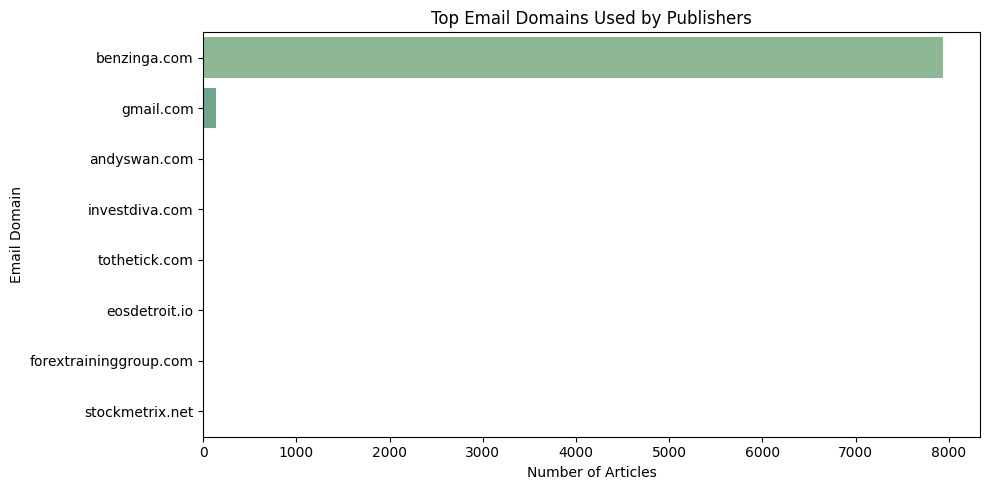

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(y=email_domain_counts.index, x=email_domain_counts.values, palette="crest")
plt.title("Top Email Domains Used by Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Email Domain")
plt.tight_layout()
plt.show()
